In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("Doctors job dataset.csv")
df.head()

,S.No,Resume Title,Work Exp,Annual Salary,Current Location,Preferred Location,Designation,U.G. Course,P. G. Course,Post P. G. Course,Age/Date of Birth,Resume ID,Last Active Date
0,1,Experienced Dermatologist with 5 years plus ex...,5.8,10.0,Kolkata,Kolkata,NaN,Mbbs,Md Dermatology,Dr,40.0,0c264007658bd1c224,2016
1,2,"M.B.B.S.,D.D.V.(Skin) with 5 yrs experience.",5.0,10.5,Dubai,Dubai,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,NaN,40.0,3697d8852652123c53,2014
2,3,"MBBS, D.V.D & DNB (Dermatology) with 7 yrs exp...",8.2,30.0,Dubai,All India,Dermatologist,Mbbs,Dnb,NaN,48.0,4b98d6db4fc0b5b012,2009
3,4,"MBBS; DNB, FCPS,DDV with 6yrs of Exp.",7.0,9.6,Mumbai,Mumbai,NaN,Mbbs,Dnb Dermatology,D.d.v,41.0,59063066742215cd70,2013
4,5,Medical and cosmetic dermatology and dermatosu...,10.0,15.0,New Delhi,Delhi / Ncr,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,NaN,40.0,1aea93342d8c652a71,2018


DESCRIPTIVE STATISTICS

In [4]:
df.shape

(399, 13)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No                399 non-null    int64  
 1   Resume Title        394 non-null    object 
 2   Work Exp            399 non-null    float64
 3   Annual Salary       399 non-null    float64
 4   Current Location    399 non-null    object 
 5   Preferred Location  399 non-null    object 
 6   Designation         361 non-null    object 
 7   U.G. Course         399 non-null    object 
 8   P. G. Course        399 non-null    object 
 9   Post P. G. Course   66 non-null     object 
 10  Age/Date of Birth   333 non-null    float64
 11  Resume ID           399 non-null    object 
 12  Last Active Date    399 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 40.6+ KB


,S.No,Work Exp,Annual Salary,Age/Date of Birth,Last Active Date
count,399.000000,399.000000,399.000000,333.000000,399.000000
mean,201.864662,9.738596,15.104787,37.912913,2020.345865
std,116.417446,5.149676,14.518807,5.304145,1.328345
min,1.000000,5.000000,0.000000,22.000000,2009.000000
25%,101.500000,6.000000,6.000000,34.000000,2020.000000
50%,202.000000,8.000000,12.000000,37.000000,2021.000000
75%,302.500000,12.000000,20.000000,41.000000,2021.000000
max,403.000000,31.000000,101.000000,51.000000,2021.000000


In [6]:
df.isnull().any()

S.No                  False
Resume Title           True
Work Exp              False
Annual Salary         False
Current Location      False
Preferred Location    False
Designation            True
U.G. Course           False
P. G. Course          False
Post P. G. Course      True
Age/Date of Birth      True
Resume ID             False
Last Active Date      False
dtype: bool

In [7]:
df.isnull().sum()

S.No                    0
Resume Title            5
Work Exp                0
Annual Salary           0
Current Location        0
Preferred Location      0
Designation            38
U.G. Course             0
P. G. Course            0
Post P. G. Course     333
Age/Date of Birth      66
Resume ID               0
Last Active Date        0
dtype: int64

In [8]:
df.head()

,S.No,Resume Title,Work Exp,Annual Salary,Current Location,Preferred Location,Designation,U.G. Course,P. G. Course,Post P. G. Course,Age/Date of Birth,Resume ID,Last Active Date
0,1,Experienced Dermatologist with 5 years plus ex...,5.8,10.0,Kolkata,Kolkata,NaN,Mbbs,Md Dermatology,Dr,40.0,0c264007658bd1c224,2016
1,2,"M.B.B.S.,D.D.V.(Skin) with 5 yrs experience.",5.0,10.5,Dubai,Dubai,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,NaN,40.0,3697d8852652123c53,2014
2,3,"MBBS, D.V.D & DNB (Dermatology) with 7 yrs exp...",8.2,30.0,Dubai,All India,Dermatologist,Mbbs,Dnb,NaN,48.0,4b98d6db4fc0b5b012,2009
3,4,"MBBS; DNB, FCPS,DDV with 6yrs of Exp.",7.0,9.6,Mumbai,Mumbai,NaN,Mbbs,Dnb Dermatology,D.d.v,41.0,59063066742215cd70,2013
4,5,Medical and cosmetic dermatology and dermatosu...,10.0,15.0,New Delhi,Delhi / Ncr,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,NaN,40.0,1aea93342d8c652a71,2018


In [9]:
df['Post P. G. Course'].nunique()

43

In [10]:
df['Post P. G. Course'].unique()

array(['Dr', nan, 'D.d.v', 'Ph.d/doctorate', 'Md', 'Dnb',
       'Mrcgp International', 'Mrcem', 'Pdcc', 'Completed Frcs', 'Dm',
       'Fmas , Dmas', 'Dermatology', 'Certificate Course', 'Mbbs Md',
       'Diploma Digital Marketing ', 'Clinical Diabetologist', 'Diploma',
       'Mbbs,dnb  Internal Medicine', 'Pgdgm',
       'Diplomat Of Royal College Of Pathologists, London, Uk',
       'Post Graduation In General Practice', 'Other', 'Urogynecologist',
       'Mrcpuk', 'M.d.pharmacology', 'Masters In Hospital Administration',
       'Iadvl Observership', 'Dmm', 'Public Health', 'Mbbs', 'Dpd',
       'Mrcp', 'Dermatologist', 'Successful Aging And End Of Life Care',
       'Mbbs, Md', 'Pgdmc', 'Md Dermatology', 'Msc Dermatology',
       'Cosmetology', 'Diplomate Of National Board', 'M.d Skin And V.d',
       'Fellowship In Aesthetic Medicine', 'M.d.d.v.l'], dtype=object)

In [11]:
course = 'Post P. G. Course'
df.drop(course, axis=1, inplace=True)
df.tail()

,S.No,Resume Title,Work Exp,Annual Salary,Current Location,Preferred Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth,Resume ID,Last Active Date
394,399,dermatologist cosmetologist Hair Transplant su...,10.0,27.0,New Delhi,"Uae,india,qatar",Consultant Dermatologist,Mbbs,Dnb Dermatology,NaN,48a7aee24aff97e770,2021
395,400,Dermatologist Specialist with more than 5 year...,6.0,18.0,Nellore,"Qatar,dubai",Specialist Dermatologist Cosmetologist,Mbbs,Medical-ms/md,37.0,fbe7d9e52fa3478687b22b6f8cc741cf,2021
396,401,Senior Consultant Dermatologist in Kaya Skin C...,12.0,6.0,Hyderabad,Hyderabad,"Senior Dermatologist,trichologist And Cosmetol...",Mbbs,Medical-ms/md,44.0,a6699f56eaa14eca9732574fc1f98cc1,2021
397,402,"Dermatologist and cosmetologist, MD Dermatolog...",6.7,30.0,New Delhi,Delhi / Ncr,Consultant Dermatologist,Mbbs,Md Dermatology,31.0,298364e929a641a4b49eafc8a6118cc9,2021
398,403,Consultant dermatologist and cosmetologist,7.0,18.5,Kolkata,All India,Consultant Dermatologist And Cosmetologist,Mbbs,Medical-ms/md,37.0,6bdc74e953ab19bd24,2021


In [12]:
df.isnull().sum()

S.No                   0
Resume Title           5
Work Exp               0
Annual Salary          0
Current Location       0
Preferred Location     0
Designation           38
U.G. Course            0
P. G. Course           0
Age/Date of Birth     66
Resume ID              0
Last Active Date       0
dtype: int64

In [13]:
df.isnull().mean()*100

S.No                   0.000000
Resume Title           1.253133
Work Exp               0.000000
Annual Salary          0.000000
Current Location       0.000000
Preferred Location     0.000000
Designation            9.523810
U.G. Course            0.000000
P. G. Course           0.000000
Age/Date of Birth     16.541353
Resume ID              0.000000
Last Active Date       0.000000
dtype: float64

In [14]:
df['Designation'].nunique()

195

In [15]:
df['Designation'].unique()

array([nan, 'Consultant Dermatologist And Cosmetologist', 'Dermatologist',
       'Consulting Dermatologist', 'Senior Resident',
       'Consultant Dermatologist & Cosmetologist',
       'Consultant Dermatologist',
       'Clinical Head - Aesthetics, India & South Asia',
       'Specialist Family Medicine', 'Dermatologist And Cosmetologist',
       'Apollo Tele Health Services',
       'Senior Consultant  Histopathology And Cytology',
       'Deputy Medical Superintendent',
       'Consultant And Head Microbiology', 'Skin Consultant',
       'Medical Officer', 'Consultant', 'Pathologist', 'Registrar',
       'Consultant Gynaecologist And Family Physician',
       'Associate Professor', 'Senior Associate',
       'Tele Medicine Consultant', 'Hospital Administrator',
       'Senior Medical Officer', 'Lt Colonel',
       'Assistant Professor, Dermatology', 'Senior Consultant Pathology',
       'Drug Safety Physician', 'Radiologist', 'Junior Resident Doctor',
       'Director Philanthropy'

UNIVARIATE ANALYSIS

C:\Users\AMIT KUMAR BHADRA\AppData\Local\Temp\ipykernel_11156\3867061911.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age/Date of Birth'])


<Axes: xlabel='Age/Date of Birth', ylabel='Density'>

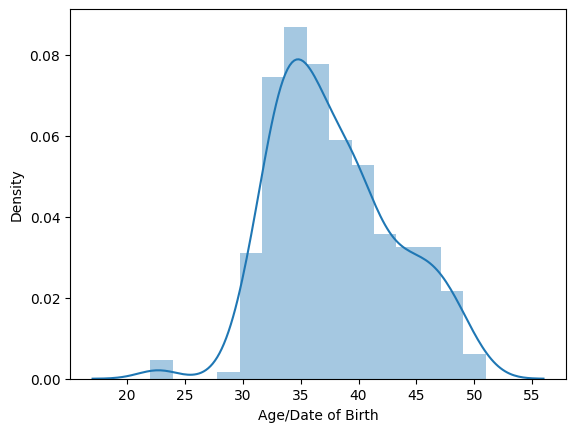

In [16]:
import seaborn as sns
sns.distplot(df['Age/Date of Birth'])

C:\Users\AMIT KUMAR BHADRA\AppData\Local\Temp\ipykernel_11156\470341474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['U.G. Course'])


ValueError: could not convert string to float: 'Mbbs'

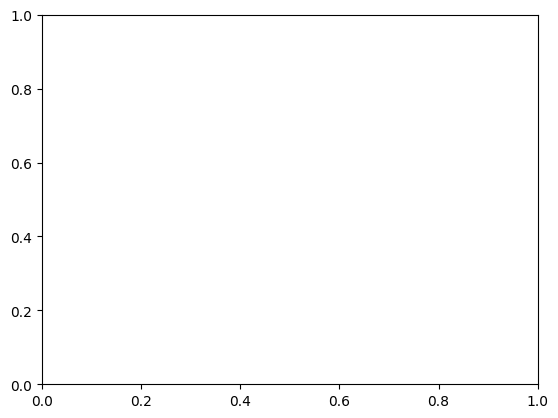

In [19]:
sns.distplot(df['U.G. Course'])

BIVARIATE ANALYSIS

<Axes: xlabel='Age/Date of Birth', ylabel='Work Exp'>

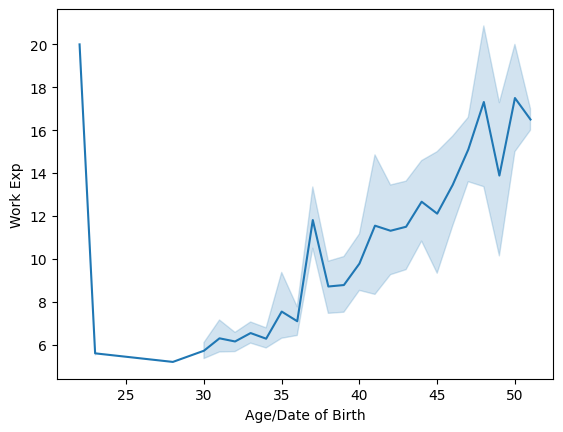

In [ ]:
sns.lineplot(x = df['Age/Date of Birth'], y =df['Work Exp'])

In [ ]:
df['Designation'].mode()

0    Consultant Dermatologist
Name: Designation, dtype: object

replacing the most frequent values in the categorical missing values

In [ ]:
df['Designation'].fillna('Consultant Dermatologist', inplace = True)
df.isnull().sum()

S.No                   0
Resume Title           5
Work Exp               0
Annual Salary          0
Current Location       0
Preferred Location     0
Designation            0
U.G. Course            0
P. G. Course           0
Age/Date of Birth     66
Resume ID              0
Last Active Date       0
dtype: int64

In [ ]:
df['Resume Title'].mode()

0    Dermatologist
Name: Resume Title, dtype: object

In [ ]:
df['Resume Title'].fillna('Dermatologist', inplace = True)
df.isnull().sum()

S.No                   0
Resume Title           0
Work Exp               0
Annual Salary          0
Current Location       0
Preferred Location     0
Designation            0
U.G. Course            0
P. G. Course           0
Age/Date of Birth     66
Resume ID              0
Last Active Date       0
dtype: int64

In [ ]:
# filling numerical values with median 
df = df.fillna(value = df['Age/Date of Birth'].median())
df.isnull().sum()

S.No                  0
Resume Title          0
Work Exp              0
Annual Salary         0
Current Location      0
Preferred Location    0
Designation           0
U.G. Course           0
P. G. Course          0
Age/Date of Birth     0
Resume ID             0
Last Active Date      0
dtype: int64

In [ ]:
df.head()

,S.No,Resume Title,Work Exp,Annual Salary,Current Location,Preferred Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth,Resume ID,Last Active Date
0,1,Experienced Dermatologist with 5 years plus ex...,5.8,10.0,Kolkata,Kolkata,Consultant Dermatologist,Mbbs,Md Dermatology,40.0,0c264007658bd1c224,2016
1,2,"M.B.B.S.,D.D.V.(Skin) with 5 yrs experience.",5.0,10.5,Dubai,Dubai,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,40.0,3697d8852652123c53,2014
2,3,"MBBS, D.V.D & DNB (Dermatology) with 7 yrs exp...",8.2,30.0,Dubai,All India,Dermatologist,Mbbs,Dnb,48.0,4b98d6db4fc0b5b012,2009
3,4,"MBBS; DNB, FCPS,DDV with 6yrs of Exp.",7.0,9.6,Mumbai,Mumbai,Consultant Dermatologist,Mbbs,Dnb Dermatology,41.0,59063066742215cd70,2013
4,5,Medical and cosmetic dermatology and dermatosu...,10.0,15.0,New Delhi,Delhi / Ncr,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,40.0,1aea93342d8c652a71,2018


In [ ]:

drop2 ='Resume ID' 
drop3 ='Last Active Date'
drop4 = 'Resume Title'
drop5= 'Preferred Location'
drop6 = 'S.No'

df = df.drop(drop2,axis=1)
df = df.drop(drop3,axis=1)
df = df.drop(drop4,axis=1)
df = df.drop(drop5,axis=1)
df = df.drop(drop6,axis=1)

In [21]:
df.head()

,S.No,Resume Title,Work Exp,Annual Salary,Current Location,Preferred Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth,Resume ID,Last Active Date
0,1,Experienced Dermatologist with 5 years plus ex...,5.8,10.0,Kolkata,Kolkata,NaN,Mbbs,Md Dermatology,40.0,0c264007658bd1c224,2016
1,2,"M.B.B.S.,D.D.V.(Skin) with 5 yrs experience.",5.0,10.5,Dubai,Dubai,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,40.0,3697d8852652123c53,2014
2,3,"MBBS, D.V.D & DNB (Dermatology) with 7 yrs exp...",8.2,30.0,Dubai,All India,Dermatologist,Mbbs,Dnb,48.0,4b98d6db4fc0b5b012,2009
3,4,"MBBS; DNB, FCPS,DDV with 6yrs of Exp.",7.0,9.6,Mumbai,Mumbai,NaN,Mbbs,Dnb Dermatology,41.0,59063066742215cd70,2013
4,5,Medical and cosmetic dermatology and dermatosu...,10.0,15.0,New Delhi,Delhi / Ncr,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,40.0,1aea93342d8c652a71,2018


In [ ]:
df.isnull().sum()

Work Exp             0
Annual Salary        0
Current Location     0
Designation          0
U.G. Course          0
P. G. Course         0
Age/Date of Birth    0
dtype: int64

ENCODING

In [ ]:
df['Current Location'] = le.fit_transform(df['Current Location'])
df['Designation'] = le.fit_transform(df['Designation'])
df['U.G. Course'] = le.fit_transform(df['U.G. Course'])
df['P. G. Course'] = le.fit_transform(df['P. G. Course'])
df.tail()

,Work Exp,Annual Salary,Current Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth
394,10.0,27.0,48,42,0,14,37.0
395,6.0,18.0,47,184,0,60,37.0
396,12.0,6.0,26,159,0,60,44.0
397,6.7,30.0,48,42,0,48,31.0
398,7.0,18.5,34,44,0,60,37.0


SPLITTING INTO X AND Y

In [ ]:
X = df.drop('Annual Salary', axis =1)
y = df['Annual Salary']

In [ ]:
X

,Work Exp,Current Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth
0,5.8,34,42,0,48,40.0
1,5.0,17,44,0,67,40.0
2,8.2,17,79,0,12,48.0
3,7.0,42,42,0,14,41.0
4,10.0,48,44,0,67,40.0
...,...,...,...,...,...,...
394,10.0,48,42,0,14,37.0
395,6.0,47,184,0,60,37.0
396,12.0,26,159,0,60,44.0
397,6.7,48,42,0,48,31.0


In [ ]:
y

0      10.0
1      10.5
2      30.0
3       9.6
4      15.0
       ... 
394    27.0
395    18.0
396     6.0
397    30.0
398    18.5
Name: Annual Salary, Length: 399, dtype: float64

TRAIN TEST SPLIT

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
X_train.shape,X_test.shape, y_test.shape,y_train.shape

((319, 6), (80, 6), (80,), (319,))

In [ ]:
X_train

,Work Exp,Current Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth
3,7.0,42,42,0,14,41.0
18,27.0,49,152,0,51,37.0
377,5.0,5,42,0,60,37.0
248,8.0,34,151,0,60,40.0
177,19.0,42,42,0,26,37.0
...,...,...,...,...,...,...
71,18.0,42,19,0,33,44.0
106,11.0,22,42,0,46,39.0
270,21.0,42,42,0,60,41.0
348,6.0,19,42,0,29,35.0


## Model Building 

## DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state =42)

In [ ]:
dtr.fit(X_train, y_train)

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

DecisionTreeRegressor(random_state=42)

In [ ]:
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
y_train_pred[:5], y_test_pred[:5]

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

(array([ 9.6, 80. ,  0. , 25. , 32. ]), array([30. , 17.4,  0. , 40. , 36.5]))

In [ ]:
r2_score(y_train, y_train_pred)*100, r2_score(y_test, y_test_pred)*100

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_s

(99.89507989021106, -139.03487233400043)

In [ ]:
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_s

(0.22570532915360503, 456.33275000000003)

In [ ]:
dtr.predict([[7.0,34,44,0,60,37.0]]) # decision tree

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([18.5])

#### Random Forest Regressor

In [ ]:
X_train

,Work Exp,Current Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth
3,7.0,42,42,0,14,41.0
18,27.0,49,152,0,51,37.0
377,5.0,5,42,0,60,37.0
248,8.0,34,151,0,60,40.0
177,19.0,42,42,0,26,37.0
...,...,...,...,...,...,...
71,18.0,42,19,0,33,44.0
106,11.0,22,42,0,46,39.0
270,21.0,42,42,0,60,41.0
348,6.0,19,42,0,29,35.0


In [ ]:
rf.fit(X_train,y_train)

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

RandomForestRegressor(random_state=42)

In [ ]:
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_train_pred, y_train_pred

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

(array([11.722 , 72.112 ,  2.36  , 22.438 , 30.05  , 10.739 , 13.45  ,
        10.258 ,  8.904 , 10.539 ,  8.274 ,  6.563 , 14.215 , 20.378 ,
         5.023 , 19.373 , 31.111 , 13.25  ,  2.542 , 26.871 ,  4.815 ,
        27.443 , 10.74  , 11.323 , 12.9595, 15.127 , 16.833 ,  4.632 ,
        10.1726, 20.581 ,  7.811 ,  7.556 ,  2.014 , 17.087 , 11.572 ,
         2.228 , 35.42  ,  2.797 ,  3.097 , 18.213 ,  3.735 , 16.722 ,
         9.034 , 22.6402, 12.603 , 31.059 , 23.583 , 38.4348,  5.35  ,
         1.987 , 58.4187, 13.406 , 13.86  , 13.921 , 11.428 , 12.52  ,
        12.276 ,  9.363 ,  9.2545, 13.927 ,  6.306 , 15.73  ,  9.439 ,
        26.329 ,  4.261 , 13.739 ,  8.775 , 18.041 , 13.534 , 25.0221,
        12.7319, 20.046 ,  5.215 ,  1.777 ,  9.574 ,  4.835 , 27.449 ,
        18.958 ,  5.554 , 13.277 ,  4.963 , 33.238 , 14.05  ,  3.27  ,
        19.292 , 11.0996,  9.122 , 11.665 , 20.038 , 38.346 ,  3.055 ,
         5.879 , 26.8526, 20.152 , 26.459 , 10.965 ,  6.169 , 12.877 ,
      

In [ ]:
acc = r2_score(y_test,y_test_pred)
acc

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


-0.40383766732072934

In [ ]:

mae = mean_absolute_error(y_test, y_test_pred)
mae

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


10.75380429416895

In [ ]:
rf.predict([[12.0,26,159,0,60,37.0]])

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.918])

In [ ]:
df.tail()

,Work Exp,Annual Salary,Current Location,Designation,U.G. Course,P. G. Course,Age/Date of Birth
394,10.0,27.0,48,42,0,14,37.0
395,6.0,18.0,47,184,0,60,37.0
396,12.0,6.0,26,159,0,60,44.0
397,6.7,30.0,48,42,0,48,31.0
398,7.0,18.5,34,44,0,60,37.0


## LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
y_train_pred = reg .predict(X_train)
y_test_pred = reg .predict(X_test)
y_train_pred[:5], y_test_pred[:5]

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

(array([14.952416  , 32.67094167,  8.78766143, 15.1487654 , 24.39438924]),
 array([25.79584152, 24.9898663 , 22.55527927, 16.73012374, 21.1590723 ]))

Checking the accuracy for linear reg

In [ ]:
r2_score(y_train, y_train_pred)*100 , r2_score(y_test, y_test_pred)*100

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_s

(12.804129394426711, -11.613045512459074)

In [ ]:
mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_s

(187.5767449677505, 213.07639131167443)

## XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

In [ ]:
r2_score(y_train,y_train_pred)*100 , r2_score(y_test,y_test_pred)*100

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_s

(99.82692238356525, -40.383766732072935)

In [ ]:
mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_s

(0.3723265298245993, 268.00152506071475)

In [ ]:
y.tail()

394    27.0
395    18.0
396     6.0
397    30.0
398    18.5
Name: Annual Salary, dtype: float64

In [ ]:
rf.predict([[7.0,34,44,0,60,37.0]]) # random forest regressor

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([15.309])

In [ ]:
reg.predict([[7.0,34,44,0,60,37.0]]) # linear regression

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.51278812])

In [ ]:
dtr.predict([[7.0,34,44,0,60,37.0]]) # decision tree

c:\Users\AMIT KUMAR BHADRA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([18.5])

In [ ]:
xg.predict([[7.0,34,44,0,60,37.0]]) # xg boost

array([17.6803], dtype=float32)

In [ ]:
import pickle

In [ ]:
pickle.dump(dtr,open('startups.pkl','wb'))